# Проектная работа по модулю “Математика и статистика в Python”

1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

# 1. Загрузить файл hr.csv.

In [4]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

mean - среднее значение;
std - стандартное (сред.) отклонение;
min - минимум;
max - максимум;
median - медиана;
mode - мода.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [7]:
from numpy import median

In [8]:
df.median().T

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
df.mode().T

,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4,NaN
average_montly_hours,135,156
time_spend_company,3,NaN
Work_accident,0,NaN
left,0,NaN
promotion_last_5years,0,NaN
sales,sales,NaN
salary,low,NaN


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [9]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


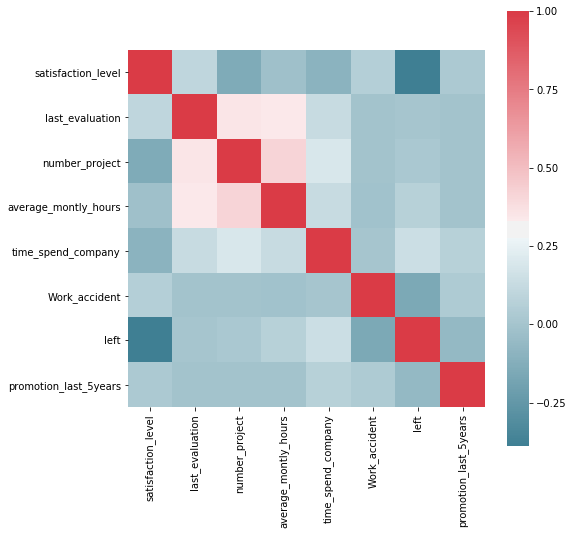

In [11]:
f, ax = plt.subplots(figsize=(8, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Сильных и даже средних корреляций нет, но есть ряд зависимостей, которые можно отметить (значения >= |0.3|):
1) слабая обратная корреляция между уходом сотрудника из компании и уровнем его удволетворенности;
2) слабая прямая корреляция между количеством проектов на сотруднике и последней его оценкой; 
3) слабая прямяя корреляция между средним количеством рабочих часов в месяц и количеством проектов на сотруднике;
4) слабая прямая корреляция между последней оценкой сотрудника и среднем количеством отработанных в месяце часов.

# 4. Визуализировать несколько взаимосвязей между переменными.

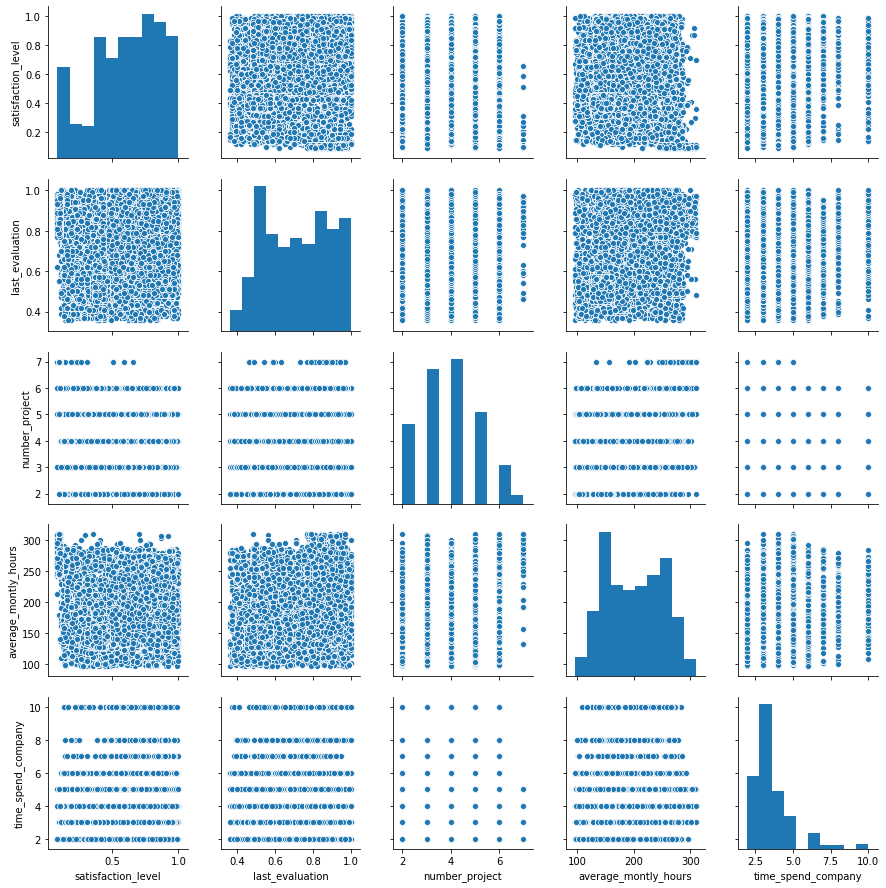

In [12]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

Выводы из визуализаций:
- У сотрудников с максимальным количеством проектов уровень удовлетворенности низкий, высоких и средних значений сильно меньше, чем в группах с меньшим количеством проектов. Это указывает на перегруженность персонала.
- Сотрудники с более высоким баллом по их оценке участвуют в большем количестве проектов, чем те у кого ниже или кто меньше по сроку работает в компании.

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Гипотеза 1: нет различия в оценках у уволившихся сотрудников и у всех сотрудников

In [15]:
ttest = stats.ttest_ind(df["last_evaluation"], df[df["left"] == 1]["last_evaluation"])
print(ttest)
print(f"{ttest.pvalue:0.5f}")

Ttest_indResult(statistic=-0.6116021924432762, pvalue=0.540808475065452)
0.54081


P = 0.54, поэтому гипотеза не отвергается.

Гипотеза 2: Уровень удовлетворенности у уволившихся и работающих сотрудников не отличается.

In [17]:
ttest = stats.ttest_ind(df[df["left"] == 0]["satisfaction_level"], df[df["left"] == 1]["satisfaction_level"])
print(ttest)
print(f"{ttest.pvalue:0.5f}")

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)
0.00000


P = 0.00, поэтому гипотеза отвергается.

Гипотеза 3: среднее количество отработанных часов не отличается в группах уволившихся и работающих сотрудников.

In [18]:
ttest = stats.ttest_ind(df[df["left"] == 0]["average_montly_hours"], df[df["left"] == 1]["average_montly_hours"])
print(ttest)
print(f"{ttest.pvalue:0.5f}")

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)
0.00000


Р = 0.00, поэтому гипотеза отвергается.

# 6. Рассчитать сколько работников работает в каждом департаменте.

In [23]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Количество работающих и уволившихся сотрудников.

In [22]:
count_by_dep = df[df['left']==0].groupby('sales').count()[['salary']].rename(columns={"salary":"count"}).reset_index().sort_values(by='count', ascending=False)
count_by_dep

,sales,count
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


Количество работников в каждом департаменте в порядке убывания.

# 7. Показать распределение сотрудников по зарплатам.

In [30]:
salary_count = df.groupby('salary')['left'].count().sort_values(ascending=False)

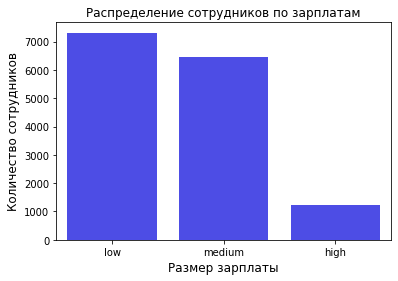

In [32]:
fig=sns.barplot(salary_count.index, salary_count, color="blue",alpha=0.8)
plt.xlabel('Размер зарплаты', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.title('Распределение сотрудников по зарплатам')
plt.show()

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [33]:
salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"}).reindex(level=1, index = ['high', 'medium', 'low'])
salary_by_dep

count_by_salary
sales       salary                 
IT          high                 83
            medium              535
            low                 609
RandD       high                 51
            medium              372
            low                 364
accounting  high                 74
            medium              335
            low                 358
hr          high                 45
            medium              359
            low                 335
management  high                225
            medium              225
            low                 180
marketing   high                 80
            medium              376
            low                 402
product_mng high                 68
            medium              383
            low                 451
sales       high                269
            medium             1772
            low                2099
support     high                141
            medium              942
            low                1146
technical   high                201
            medium             1147
            low                1372

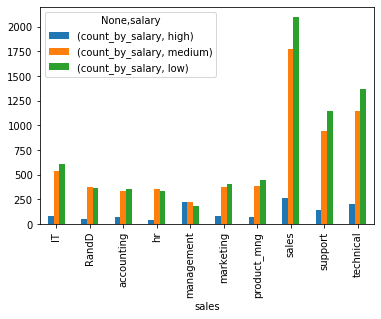

In [34]:
salary_by_dep.unstack('salary').plot(kind='bar')
plt.show()

# 9. Сколько сотрудников покинули компанию.

In [35]:
print(df.left.sum(),'cотрудников покинули компанию.')

3571 cотрудников покинули компанию.


# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [36]:
df.groupby('left').mean().T

left,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


Рассчет средних значений показателей в разрезе статуса сотрудников (1 - уволившиеся, 0 - действующие сотрудники). На основе отклонений между средними показателями между двух групп выдвинем и проверим гипотезы.

Гипотеза 1: сотрудники с низким уровнем удовлетворенности увольняются чаще

In [39]:
ttest = stats.ttest_ind(df["satisfaction_level"][df["left"] == False], df["satisfaction_level"][df["left"] == True])
print(ttest)
print(f"P = {ttest.pvalue:0.5f}")

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)
P = 0.00000


P=0.0, следовательно гипотеза 1 может быть принята.

In [ ]:
Гипотеза 2: уволившихся сотрудников реже повышали в должности

In [41]:
ttest = stats.ttest_ind(df[df["left"] == 0]["promotion_last_5years"], df[df["left"] == 1]["promotion_last_5years"])
print(ttest)
print(f"P = {ttest.pvalue:0.5f}")

Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)
P = 0.00000


In [ ]:
P=0.0, следовательно гипотеза 2 может быть принята.

Гипотеза 3: сотрудники с низкой или, наоборот, высокой оценкой (evaluation) увольняются чаще

In [40]:
ttest = stats.ttest_ind(df["last_evaluation"][df["left"] == 0], df["last_evaluation"][df["left"] == 1])
print(ttest)
print(f"P = {ttest.pvalue:0.5f}")

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)
P = 0.42127


P=0.4, следовательно гипотеза 3 не может быть принята.